# Trigonometrische Höhenbestimmung
## Auswertung Madrisa

Mit den Testdaten aus dem ./test_data - Ordner

Ein Programm von Kamm M. und Boppart R. (G2023)

## 1. Einfache Auswertung einer Visur


### 1.0. Import


Für das Programm sind folgende Python-Bibliotheken zwingend benötigt:
 - pandas
 - numpy
 - tabulate
 - weasyprint
 - markdown

Für das env wird folgendes vorgeschlagen, um die Bibliotheken zu importieren:

```py
conda create -n thb-auswertung python=3.10 -c conda-forge -y
conda install jupyterlab numpy Pandas tabulate weasyprint markdown -c conda-forge -y
```


Weitere Informationen können dem readme entnommen werden

In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
from utils.imports import import_csv, import_fix
from utils.calculate import master_thb
from utils.exports import export_protocol, export2csv, export_protocol_md_pdf
from utils.plots import boxplot

from pathlib import Path

## Settings für die Anzeige von DataFrames
import pandas as pd
pd.set_option("display.float_format", "{:.4f}".format)

### 1.1. Setzen der Projektvaribeln

#### 1.1.1. Filepfade

In [11]:
## A ist immer die Station mit der tieferen Punktnummer

mess1_A2B = "./test_data/THB_data/THB-1003-1009.csv"
mess2_B2A = "./test_data/THB_data/THB-1009-1003.csv"

fix = "./test_data/20250919_Naeherungskoord-THB.txt"

export_folder = Path("./test_data/THB_results/")

#### 1.1.2. Umgebungsvariabeln

In [4]:
## Vergabe der Variabeln der Stationen
## A ist immer die Station mit der tieferen Punktnummer

signalhoehe_A = 1.6804
offset_A = 0.2844

signalhoehe_B = 1.8494
offset_B = 0.2844

visurnummer = "Visur_1003-1009"

### 1.2. Berechnungen

In [9]:
## Erstellung der Liste der Basisdaten
data = [signalhoehe_A, offset_A, signalhoehe_B, offset_B]

## Import der ersten csv-Datei mit den Messdaten
df100 = import_csv(mess1_A2B)

## Import der zweiten csv-Datei mit den Messdaten
df200 = import_csv(mess2_B2A)

## Import der Näherungskoordinaten
df_aprox = import_fix(fix)

## Höhenberechnung
df300_new, infos_vis, infos_height, infos_k, infos_sd = master_thb(df100, 
                                                                   df200, 
                                                                   df_aprox, 
                                                                   signalhoehe_A, 
                                                                   signalhoehe_B, 
                                                                   offset_A, offset_B)

## DataFrame mit den Ergebnissen
df300_new

,ID Visur,ID Messung,Lage,d' (schräg) A-->B [m],d' (schräg) B-->A [m],"d' (mittel, schräg) [m]",V-Winkel A-->B [gon],V-Winkel B-->A [gon],Höhendiff. [m],Refraktionskoeff. k
0,Visur_1003-1009,1-1.1,1,2494.3355,2494.3330,2494.3343,104.7935,95.2292,187.3622,0.0900
1,Visur_1003-1009,1-1.2,1,2494.3361,2494.3330,2494.3346,104.7935,95.2292,187.3610,0.0800
2,Visur_1003-1009,1-1.3,1,2494.3363,2494.3328,2494.3346,104.7935,95.2296,187.3548,0.0700
3,Visur_1003-1009,1-2.1,2,2494.3333,2494.3330,2494.3332,104.7920,95.2288,187.3416,0.1600
4,Visur_1003-1009,1-2.2,2,2494.3340,2494.3336,2494.3338,104.7922,95.2287,187.3461,0.1600
5,Visur_1003-1009,1-2.3,2,2494.3340,2494.3342,2494.3341,104.7925,95.2287,187.3508,0.1500
6,Visur_1003-1009,2-1.1,1,2494.3358,2494.3344,2494.3351,104.7954,95.2300,187.3833,-0.0300
7,Visur_1003-1009,2-1.2,1,2494.3357,2494.3340,2494.3349,104.7939,95.2303,187.3478,0.0300
8,Visur_1003-1009,2-1.3,1,2494.3355,2494.3334,2494.3345,104.7941,95.2301,187.3551,0.0300
9,Visur_1003-1009,2-2.1,2,2494.3298,2494.3337,2494.3318,104.7921,95.2289,187.3405,0.1500


### 1.3. Ausgabe

In [12]:
export_protocol(df300_new,
                infos_vis, 
                infos_height, 
                infos_k, 
                infos_sd, 
                visurnummer, 
                export_folder, 
                data)

In [13]:
export2csv(df300_new,
           infos_vis, 
           infos_height, 
           infos_k, 
           infos_sd, 
           visurnummer, 
           export_folder, 
           data)

In [14]:
export_protocol_md_pdf(df300_new,
                       infos_vis, 
                       infos_height, 
                       infos_k, 
                       infos_sd, 
                       visurnummer, 
                       export_folder, 
                       data)

<bound method Figure.show of <Figure size 600x400 with 1 Axes>>

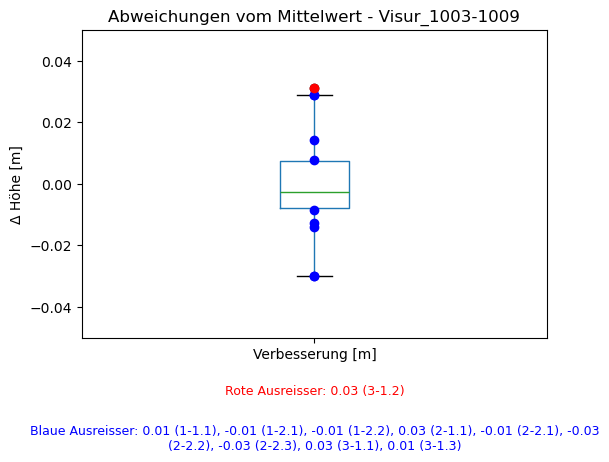

In [15]:
ax = boxplot(df300_new, infos_height, visurnummer)
ax.figure.show